In [1]:
import os
import demo
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from numpy.random import randint
from numpy.random import multivariate_normal as m_normal
from scipy.stats import norm, chi2
%matplotlib inline

In [2]:
import sys
sys.path.append(os.getcwd() + '/../')
from PLDA import PLDA

# First, run the code in demo.py so we have a trained PLDA object to examine.

In [3]:
n_classes = 10  # Number of multivariate clusters/classes.
n_list = [200 * (x % 3 + 1) for x in range(1, n_classes + 1)]  # 200-600 samples per class
n_dims = 2  # Dimensionality of the data

In [4]:
points, labels = demo.gen_artificial_data(n_classes, n_list, n_dims)

In [5]:
data = []
for x, y in zip(points, labels):
    data.append((x,y))

In [6]:
for datum in data[:5]:
    print(datum)

(array([-38.25888988, -44.06706709]), 0)
(array([-39.00540499, -45.56939152]), 0)
(array([-33.98501862, -48.47809742]), 0)
(array([-32.32412226, -46.99039859]), 0)
(array([-30.7663385, -49.2351785]), 0)


In [7]:
model = PLDA(data, save_raw=True)

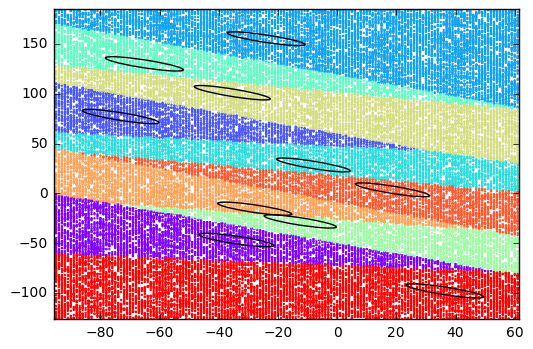

In [8]:
fig = plt.figure(0)
ax = fig.add_subplot(111)
ax = demo.plot_training_contours(model, ax, nsig=2)
demo.plot_test_classifications(model, ax, MAP_estimate=True)
plt.show()

# Now, a closer look at the PDLA model object.
We can easily access the training data, statistics of the labelled data, and model parameters.

In [9]:
model.data.keys()  # These keys are the user defined class labels.

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
model.data[5]  # Data for the class with label '5' was stored in a list.

[array([-12.03511872, -28.27381792]),
 array([-12.06326728, -25.49209286]),
 array([-14.79548502, -29.48446782]),
 array([-12.40035866, -28.32972784]),
 array([-11.97308563, -29.16540112]),
 array([-15.91024067, -23.70863348]),
 array([-20.2009874 , -25.76556042]),
 array([ -8.47241812, -29.50768199]),
 array([-12.37266019, -25.27972937]),
 array([-15.55009208, -28.30492432]),
 array([ -4.62022741, -32.12889006]),
 array([-21.53659178, -25.25491129]),
 array([-12.15131423, -28.41521817]),
 array([ -8.34542098, -28.8892679 ]),
 array([-18.54226275, -25.42814179]),
 array([ -3.05663913, -33.99946336]),
 array([-11.81883667, -28.72033998]),
 array([-11.97482864, -28.58913582]),
 array([ -8.57452775, -30.54011295]),
 array([-16.54041187, -27.53619679]),
 array([-14.89426367, -26.43995612]),
 array([-17.41030447, -26.5319687 ]),
 array([ -2.36956723, -32.84866111]),
 array([-19.75267726, -22.4001978 ]),
 array([-15.9162928 , -24.07147225]),
 array([ -9.93360559, -28.30272311]),
 array([ -9.

In [11]:
model.stats.keys()  # Again, these keys are the user defined class labels.

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
model.stats[5]  # Statistics for the class with label '5' are stored in a dictionary.

{'covariance': array([[ 24.02263666, -10.89798055],
        [-10.89798055,   7.20860576]]),
 'n': 200,
 'μ': array([-12.45669737, -28.23406362])}

In [13]:
model.stats[5]['μ']  # The mean of the class with label '5'.

array([-12.45669737, -28.23406362])

In [14]:
# Parameters the model uses, including the whitened cluster centers "v" can be accessed via the 'params' dictionary.
for param in model.params.keys():
    print(param)
    
print('\nΨ: {}'.format(model.params['Ψ']))
# You could use vars(model) to get the object attributes, but that will print EVERYTHING, including contents of variables.

Λ_b
N
A
Ψ
v_0
v_9
v_5
S_w
Λ_w
v_6
S_b
m
v_7
n_avg
v_3
v_1
v_2
v_4
K
W
v_8

Ψ: [[   27.0678952      0.        ]
 [    0.          1865.03040201]]


In [15]:
model.Ψ  # You can also access all model parameters like this, except for the whitened cluster centers.

array([[   27.0678952 ,     0.        ],
       [    0.        ,  1865.03040201]])

# Let's add more data to the model!
When you add data to the model, the model will not update any statistics or parameters until you run fit().

In [16]:
# First, print some statistics of the data in the current model.

print('N: {}\n'.format(len(model.raw_data)))
for label in model.stats.keys():
    print('{}, n: {}, mean: {}'.format(label, model.stats[label]['n'], model.stats[label]['μ']))
print('\nm: {}'.format(model.m))
print('Ψ: {}'.format(model.Ψ))

N: 4000

0, n: 400, mean: [-34.07061127 -46.86132296]
1, n: 600, mean: [-73.18705745  77.11258064]
2, n: 200, mean: [ -23.99760575  155.19020049]
3, n: 400, mean: [ -8.00246003  28.46234658]
4, n: 600, mean: [ -65.13547303  129.96317818]
5, n: 200, mean: [-12.45669737 -28.23406362]
6, n: 400, mean: [ -35.45641503  100.99554621]
7, n: 600, mean: [-27.8597671  -15.44767965]
8, n: 200, mean: [ 18.70962637   3.53374854]
9, n: 400, mean: [ 36.38799928 -97.92979264]

m: [-29.92872718  33.73538387]
Ψ: [[   27.0678952      0.        ]
 [    0.          1865.03040201]]


In [17]:
# Now, add 100 new data points, 10 to each class.
n_new_data_per_class = 10
for x in range(10):
    new_datum = (np.array([x * 1000, x * 1000]), x)
    for i in range(n_new_data_per_class):
        model.add_datum(new_datum)

In [18]:
# Even though you added data the model will not update any statistics or parameters, until you run the fit() function.
# This allows you to add a lot more new data at the same time, quickly.
print('N: {}\n'.format(len(model.raw_data)))
for label in model.stats.keys():
    print('{}, n: {}, mean: {}'.format(label, model.stats[label]['n'], model.stats[label]['μ']))
print('\nm: {}'.format(model.m))
print('Ψ: {}'.format(model.Ψ))
print('See? the statistics and parameters did not update!')

N: 4100

0, n: 400, mean: [-34.07061127 -46.86132296]
1, n: 600, mean: [-73.18705745  77.11258064]
2, n: 200, mean: [ -23.99760575  155.19020049]
3, n: 400, mean: [ -8.00246003  28.46234658]
4, n: 600, mean: [ -65.13547303  129.96317818]
5, n: 200, mean: [-12.45669737 -28.23406362]
6, n: 400, mean: [ -35.45641503  100.99554621]
7, n: 600, mean: [-27.8597671  -15.44767965]
8, n: 200, mean: [ 18.70962637   3.53374854]
9, n: 400, mean: [ 36.38799928 -97.92979264]

m: [-29.92872718  33.73538387]
Ψ: [[   27.0678952      0.        ]
 [    0.          1865.03040201]]
See? the statistics and parameters did not update!


In [19]:
# When you run the fit() method, all of the statistics and parameters are recomputed.
model.fit()

In [20]:
# Now, we should have different values!
print('N: {}\n'.format(len(model.raw_data)))
for label in model.stats.keys():
    print('{}, n: {}, mean: {}'.format(label, model.stats[label]['n'], model.stats[label]['μ']))
print('\nm: {}'.format(model.m))
print('Ψ: {}'.format(model.Ψ))

N: 4100

0, n: 410, mean: [-33.23962075 -45.71836386]
1, n: 610, mean: [-55.593827   92.2418826]
2, n: 210, mean: [  72.38323262  243.03828618]
3, n: 410, mean: [  65.36345363  100.93887471]
4, n: 610, mean: [   1.50609211  193.40640477]
5, n: 210, mean: [ 226.23171679  211.20565369]
6, n: 410, mean: [ 111.74983899  244.87370362]
7, n: 610, mean: [ 87.35104875  99.55965936]
8, n: 210, mean: [ 398.77107274  384.31785576]
9, n: 410, mean: [ 255.01268223  123.97093401]

m: [  80.55733934  142.66866719]
Ψ: [[  1.07752874e-02   0.00000000e+00]
 [  0.00000000e+00   2.75582340e+01]]
